In [1]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
# df.Survived.value_counts()
df.groupby(['Pclass','Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

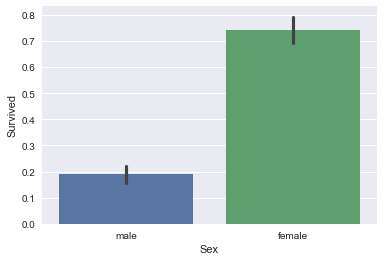

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.barplot(x='Sex',y='Survived',data=df)

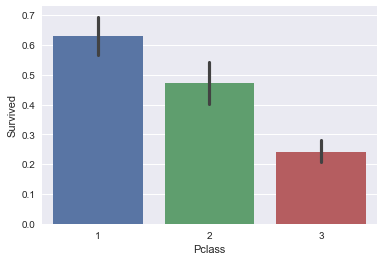

In [7]:
sns.barplot(x='Pclass',y='Survived',data=df)

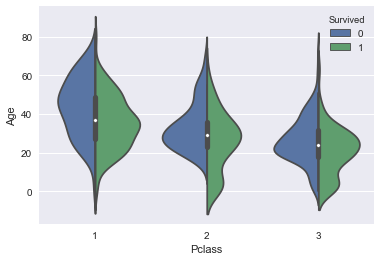

In [8]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,split=True)

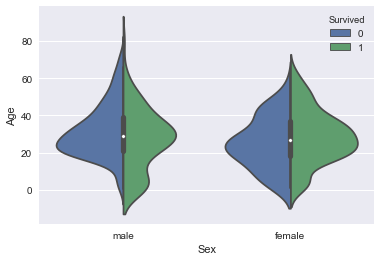

In [9]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
from sklearn.preprocessing import Imputer
df.iloc[:,[5]] = Imputer(missing_values='NaN',strategy='mean',axis=0).fit_transform(df.iloc[:,[5]])
# age_imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
# age_imputer = age_imputer.fit(df.iloc[:,[5]])
# df.iloc[:,[5]] = age_imputer.transform(df.iloc[:,[5]])

In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
lc_sex = LabelEncoder()
df.iloc[:,[4]] = lc_sex.fit_transform(df.iloc[:,[4]])
df = pd.get_dummies(df ,columns=['Pclass','Embarked'])
df.head()

C:\Users\varun\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [16]:
irrelevant_features = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin']
df = df.drop(irrelevant_features,axis=1)
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [17]:
df.to_csv("titanic_prepared_data.csv",index=0)